# 確率分布と統計モデルの最尤推定

## 種子数の統計モデリング
- 架空の植物50個体からなる集団の調査
- 各個体の種子数を数えたものがデータ

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
data = df.iloc[:, 0].values
data

array([2, 2, 4, 6, 4, 5, 2, 3, 1, 2, 0, 4, 3, 3, 3, 3, 4, 2, 7, 2, 4, 3, 3,
       3, 4, 3, 7, 5, 3, 1, 7, 6, 4, 6, 5, 2, 4, 7, 2, 2, 6, 2, 4, 5, 4, 5,
       1, 3, 2, 3])

### 統計量

In [2]:
import numpy as np
from scipy import stats

print('Min. %.2f' % data.min())
print('1st Qu. %.2f' % stats.scoreatpercentile(data, 25))
print('Median %.2f' % np.median(data))
print('Mean %.2f' % np.mean(data))
print('3rd Qu. %.2f' % stats.scoreatpercentile(data, 75))
print('Max. %.2f' % data.max())

Min. 0.00
1st Qu. 2.00
Median 3.00
Mean 3.56
3rd Qu. 4.75
Max. 7.00


### Rのsummary()

In [27]:
df.describe()

,Seed
count,50.00000
mean,3.56000
std,1.72804
min,0.00000
25%,2.00000
50%,3.00000
75%,4.75000
max,7.00000


### 度数分布とヒストグラム

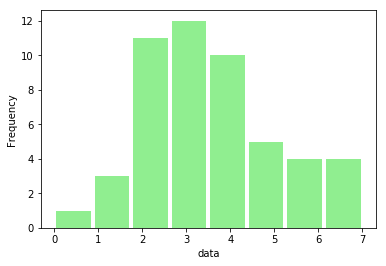

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(data, bins = len(np.unique(data)), rwidth = 0.9, color = 'lightgreen')
plt.xlabel('data')
plt.ylabel('Frequency')

## データと確率分布の対応関係

種子数データの特徴
- 数えられるカウントデータ
- 1個体の種子数の標本平均は3.56個
- 個体ごとに種子数にばらつきがあり，ヒストグラムを書くと一山の分布になる

## ポアソン分布
## $p(y | \lambda) = \frac{\lambda^y \exp(- \lambda)}{y!}$
- $p(y | \lambda)$：平均が$\lambda$であるときに，ポアソン分布に従う確率変数が$y$という値になる確率
- $\sum_{y} p(y | \lambda) = 1$
- 確率分布の平均は$\lambda$である$(\lambda \geq 0)$
- 分散と平均は等しい：$\lambda = 平均 = 分散$

In [4]:
import math
import numpy as np

def poisson(y, lamb):
    return (pow(lamb, y) * np.exp(-lamb)) / math.factorial(y)

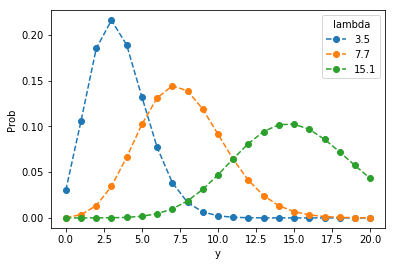

In [5]:
lamb = [3.5, 7.7, 15.1]
y = 21
for l in lamb:
    p = []
    for i in range(y):
        p.append(poisson(i, l))
    plt.plot(np.arange(0, y), p, marker = 'o', linestyle = '--', label = str(l))
    
plt.xlim(-1, 21)
plt.xlabel('y')
plt.ylabel('Prob')
plt.legend(title = 'lambda', loc = 'upper right')
plt.show()

### ポアソン分布が選ばれる理由
1. データに含まれている値$y_i$が非負の整数
1. $y_i$に下限（ゼロ）はあるが，上限はよくわからない
1. 観測データの平均と分散がだいたい等しい

## ポアソン分布のパラメータの最尤推定
尤度：あてはまりの良さ  
尤度を表す統計量を最大にするようなパラメータの値を探すパラメータ推定方法

### $L(\lambda) = \prod_{i} p(y_i | \lambda) = \prod_{i} \frac{\lambda^{y_i} \exp(-\lambda)}{y_i !}$
尤度関数$L(\lambda)$は扱いにくいので，対数変換した尤度貫通を使って最尤推定
### $\log L(\lambda) = \sum_{i}\left(y_i \log \lambda - \lambda - \sum_{k}^{y_i} \log k \right)$
対数尤度が大きい（ゼロに近い）ほど観測データとポアソン分布が「似ている」

In [35]:
def sum_log(k):
    sigma = 0
    for i in range(k):
        sigma += np.log(i + 1)
    return sigma

def log_l(y, lamb):
    l = 0
    for i in range(len(y)):
        l += y[i] * np.log(lamb) - lamb - sum_log(y[i])
    return l

In [36]:
lamb = np.arange(2.0, 5.3, 0.4)
for i in range(len(lamb)):
    L = log_l(data, lamb[i])
    print('-----')
    print('lambda = %.1f' % lamb[i])
    print('log L = %.2f' % L)

-----
lambda = 2.0
log L = -121.88
-----
lambda = 2.4
log L = -109.43
-----
lambda = 2.8
log L = -101.99
-----
lambda = 3.2
log L = -98.22
-----
lambda = 3.6
log L = -97.26
-----
lambda = 4.0
log L = -98.50
-----
lambda = 4.4
log L = -101.54
-----
lambda = 4.8
log L = -106.05
-----
lambda = 5.2
log L = -111.80


ポアソン分布と観測データの当てはまり（lambda = 3.6）

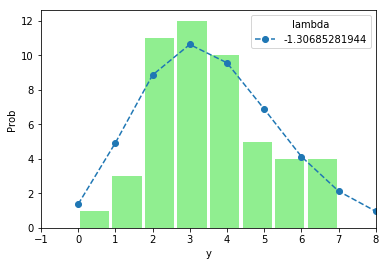

In [48]:
y = 21

p = []
for i in range(y):
    p.append(poisson(i, 3.6) * 50)
plt.plot(np.arange(0, y), p, marker = 'o', linestyle = '--', label = str(l))
plt.hist(data, bins = len(np.unique(data)), rwidth = 0.9, color = 'lightgreen')
plt.xlim(-1, 8)
plt.xlabel('y')
plt.ylabel('Prob')
plt.legend(title = 'lambda', loc = 'upper right')
plt.show()

### 対数尤度が最大になる$\lambda$を$\hat{\lambda}$とする
対数尤度関数が最大値で関数の傾きがゼロとなる$\lambda$を探す  
種子データセットの場合
### $ \frac{\partial \log L(\lambda)}{\partial \lambda}= \sum_{i} \left( \frac{y_i}{\lambda} - 1 \right) = \frac{1}{\lambda} \sum_{i} y_i - 50 $
### $\hat{\lambda} = \frac{1}{50} \sum_{i} y_i = データの標本平均 = 3.56$

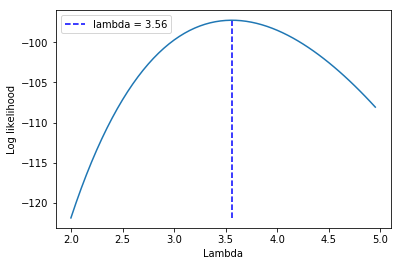

In [57]:
lamb = np.arange(2.0, 5.0, 0.05)
L = []
for i in range(len(lamb)):
    L.append(log_l(data, lamb[i]))

plt.plot(lamb, L)
p = plt.vlines([3.56], np.min(L), np.max(L), "blue", linestyles='--', label = 'lambda = 3.56')
plt.xlabel('Lambda')
plt.ylabel('Log likelihood')
plt.legend(loc = 'upper left')
plt.show()

### 尤度と最尤推定について一般化
$\theta$をパラメータとする確率分布から観測データ$y_i$が発生した場合，その確率を$p(y|\theta)$とすると尤度は
<div style="text-align: center;">
$L(\theta | {\bf Y}) = \prod_{i} p(y_i | \theta)$
</div>
対数尤度は
<div style="text-align: center;">
$\log L(\theta | {\bf Y}) = \sum_{i} \log p(y_i | \theta)$
</div>
となる．  
最尤推定とは，この対数尤度を最大にするような$\hat{\theta}$を探すこと．

### 擬似乱数と最尤推定測定値のばらつき
乱数生成関数が生成する乱数列は毎回異なる -> 標本平均も試行ごとに異なる  
lambda = 3.5でデータを生成し，標本平均を記録

In [66]:
sample_means = []
for i in range(3000):
    poi = np.random.poisson(3.5, 50)
    sample_means.append(np.mean(poi))

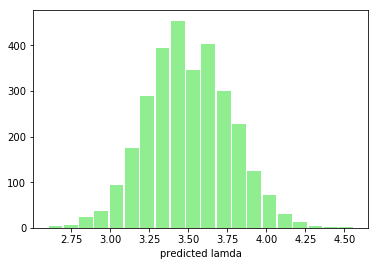

In [67]:
plt.hist(sample_means, bins = 20, rwidth = 0.9, color = 'lightgreen')
plt.xlabel('predicted lamda')
plt.show()

## 統計モデルの要点：乱数発生・推定・予測
「こういうばらつきのあるデータは，何かの確率分布から発生したと考えれば扱いやすそうだなぁ」と考えることが統計モデリングの第一歩
- 統計モデルの確率分布を使って乱数を発生させることができる．（サンプリング）
- 「パラメータ$\lambda$はどんな値？」という問いに答えるのが推定，あるいは当てはめという．


### 予測の良さ
当てはまりの良さ（対数尤度）を評価したい．

## 確率分布の選び方
- 説明したい量は離散か連続か
- 説明したい量の範囲は
- 説明したい量の標本分散と標本平均の関係は

### ポアソン分布
- データが離散値
- ゼロ以上の範囲
- 上限特になし
- 平均 $\approx$ 分散

### 二項分布
- データが離散値
- ゼロ以上で有限の範囲
- 分散は平均の関数

### 正規分布
- データが連続値
- 範囲が$[ - \infty, \infty]$
- 分散は平均とは無関係に決まる

### ガンマ分布
- データが連続値
- 範囲が$[0, \infty]$
- 分散は平均の関数